# Linear Algebra in Python


Any integer between -50 and 50 can be written as a linear combination of 5, 10, 15, 20 with scalars being elements of the set {-1, 0, 1}. For example: 10 = 1 · 5+ (-1) · 10 + 1 · 15 + 0 · 20

Calculating the Scalars

In [1]:
def factors_set():
    for a in [-1, 0, 1]:
        for b in [-1,0,1]:
            for c in [-1,0,1]:
                for d in [-1,0,1]:
                    yield (a, b, c, d)

Memorize Previous Results

In [2]:
def memoize(f):
    results = {}
    def helper(n):
        if n not in results:
            results[n] = f(n)
        return results[n]
    return helper

In [8]:
@memoize
def linear_combination(n):
    """ returns the tuple (a,b,c,d) satisfying
        n = a*5 + b*10 + c*15 + d*20      """
    weighs = (5,10,15,20)
      
    for factors in factors_set():
       sum = 0
       for a in range(len(factors)):
          sum += factors[a] * weighs[a]
       if sum == n:
          return factors

Compiling

In [9]:
# Linear combination of vectors
import numpy as np
def factors_set():
    for a in [-1, 0, 1]:
        for b in [-1, 0, 1]:
            for c in [-1, 0, 1]:
                for d in [-1, 0, 1]:
                    yield (a, b, c, d)  


def memoize(f):
    results = {}
    def helper(n):
        if n not in results:
            results[n] = f(n)
        return results[n]
    return helper

@memoize
def linear_combination(n):
    """ returns the tuple (a,b,c,d) satisfying
        n = a*5 + b*10 + c*15 + d*20      """
    weighs = (5, 10, 15, 20)
      
    for factors in factors_set():
       sum = 0
       for a in range(len(factors)):
          sum += factors[a] * weighs[a]
       if sum == n:
          return factors

# calculate the linear combinations of the first 10 positive integers:
for a in range(1,21):
    print(linear_combination(a))

None
None
None
None
(-1, -1, 0, 1)
None
None
None
None
(-1, 0, 1, 0)
None
None
None
None
(-1, 0, 0, 1)
None
None
None
None
(-1, -1, 1, 1)


# Othogonality

In [10]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

Dot Product

In [11]:
dot_product = np.sum(v1 * v2)

print("The dot product of v1 and v2 is", dot_product )

The dot product of v1 and v2 is 32


Alternatively use Numpy

In [12]:
import numpy as np
dot_product = np.dot(v1,v2)

print("The dot product of v1 and v2 is", dot_product )

The dot product of v1 and v2 is 32


Finding the Length of the two vectors

In [13]:
n1 = np.sqrt(np.sum(v1 * v1))
n2 = np.sqrt(np.sum(v2 * v2))

print('The L2 norm of v1 is', n1)
print('The L2 norm of v2 is', n2)

The L2 norm of v1 is 3.7416573867739413
The L2 norm of v2 is 8.774964387392123


In Numpy

In [14]:
import numpy as np
n1 = np.linalg.norm(v1, ord=2)
n2 = np.linalg.norm(v2, ord=2)

print('The L2 norm of v1 is', n1)
print('The L2 norm of v2 is', n2)

The L2 norm of v1 is 3.7416573867739413
The L2 norm of v2 is 8.774964387392123


Graphing the Info

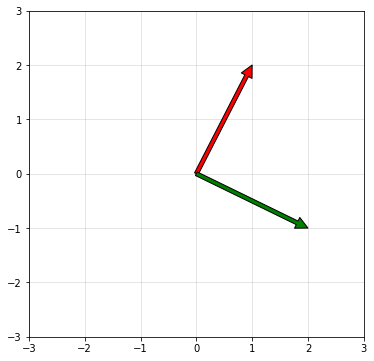

In [15]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.grid(alpha=0.4)
ax.set(xlim=(-3, 3), ylim=(-3, 3))

v1 = np.array([1,  2])
v2 = np.array([2, -1])

# Plot the orthogonal vectors
ax.annotate('', xy=v1, xytext=(0, 0), arrowprops=dict(facecolor='r'))
ax.annotate('', xy=v2, xytext=(0, 0), arrowprops=dict(facecolor='g'))
plt.show()

In 3D

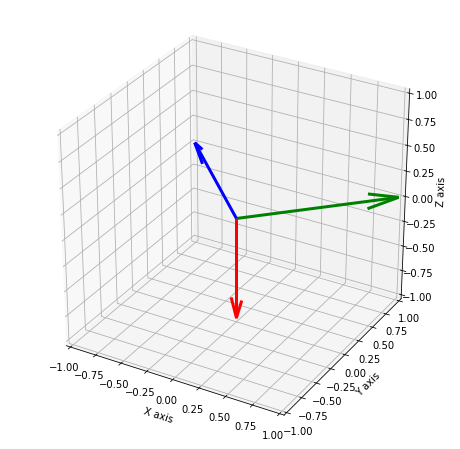

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 3D representation of the orthogonal vectors
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the orthogonal vectors
v1 = np.array([ 0, 0, -1])
v2 = np.array([ 1, 1, 0])
v3 = np.array([-1, 1, 0])
 
# Plot the orthogonal vectors
ax.quiver( 0, 0, 0, v1[0], v1[1], v1[2], color = 'r', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v2[0], v2[1], v2[2], color = 'g', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v3[0], v3[1], v3[2], color = 'b', lw=3, arrow_length_ratio=0.2)

ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()

# Eigenvalues and Eigenvectors

Solves for the eigenvalues and eigenvectors of matrix a.

In [21]:
a = np.array([[0, 1], [-2, -3]])
val, vect = np.linalg.eig(a)
print("eigenvalues: ", val)
print("eigenvectors: ", vect)

eigenvalues:  [-1. -2.]
eigenvectors:  [[ 0.70710678 -0.4472136 ]
 [-0.70710678  0.89442719]]


The matrix has no real solution when solving for eigenvalues.

In [22]:
a = np.array([[0, -1], [1, 0]])
val, vect = np.linalg.eig(a)
print("eigenvalues: ", val)
print("eigenvectors: ", vect)

eigenvalues:  [0.+1.j 0.-1.j]
eigenvectors:  [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


If the matrix a is symmetric, then any two eigenvectors from different eigenspaces are orthogonal.

In [23]:
a = np.array([[5, 2], [2, 5]])
val, vect = np.linalg.eig(a)
print("eigenvalues: ", val)
print("eigenvectors: ", vect)

eigenvalues:  [7. 3.]
eigenvectors:  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
